In [42]:
import rasterio
from rasterio.plot import show

def preview_geotiff(file_path):
    with rasterio.open(file_path) as src:
        show(src)

In [43]:
def find_highest_point(file_path):
    with rasterio.open(file_path) as src:
        # read the elevation data from the GeoTIFF file
        elev_data = src.read(1)

        # find the maximum elevation value and its corresponding location
        max_elev = np.amax(elev_data)
        max_loc = np.unravel_index(np.argmax(elev_data, axis=None), elev_data.shape)

    return max_elev, max_loc[0], max_loc[1]

In [46]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from rasterio.warp import transform

def preview_geotiff_with_dots(file_path, locations):
    with rasterio.open(file_path) as src:
        # read the elevation data from the GeoTIFF file
        elev_data = src.read(1)

        # get the minimum and maximum values of the elevation data
        elev_min = np.nanmin(elev_data)
        elev_max = np.nanmax(elev_data)

        # create a Matplotlib figure and axis objects
        fig, ax = plt.subplots(figsize=(12, 12))

        # plot the elevation data as an image
        im = ax.imshow(elev_data, cmap='terrain', vmin=elev_min, vmax=elev_max)

        # add a colorbar to the plot
        cbar = fig.colorbar(im, ax=ax, fraction=0.03, pad=0.04)

        # add dots at the specified locations
        for location in locations:
            ax.scatter(location[0], location[1], s=50, c='red', marker='o')

        # set the plot title and axis labels
        ax.set_title("AHN3 Elevation Data with Dot")
        ax.set_xlabel("Column Index")
        ax.set_ylabel("Row Index")

        # display the plot
        plt.show()
# preview_geotiff_with_dot("ahn3.TIF", (200,100))

In [57]:
def get_sample_grid_locations(file_name, n=10):
    with rasterio.open("ahn3.tif") as src:
        elev_data = src.read(1)
        shape = elev_data.shape
        
        num_rows = n
        num_cols = n
        row_step = shape[0] // num_rows
        col_step = shape[1] // num_cols
        locations = []
        for row_idx in range(num_rows):
            for col_idx in range(num_cols):
                row_start = row_idx * row_step
                col_start = col_idx * col_step
                x = col_start + col_step // 2
                y = row_start + row_step // 2
                locations.append((x, y))
    
    return locations

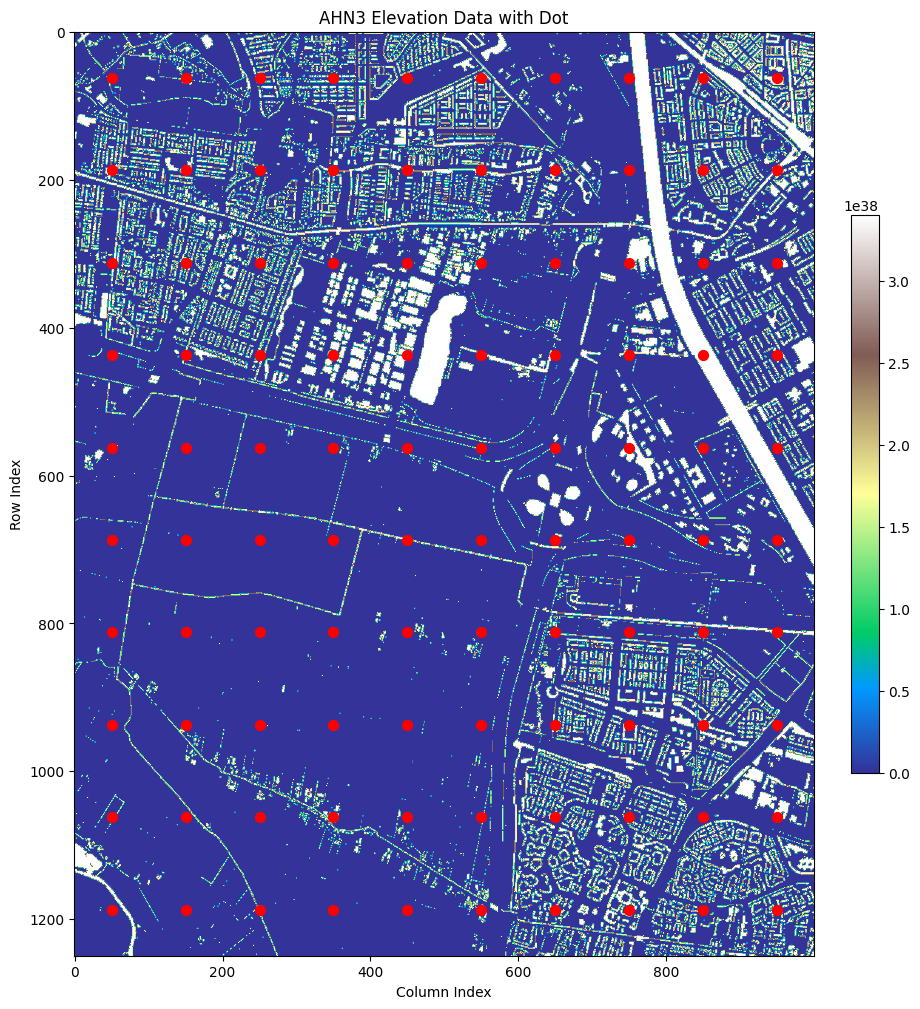

In [58]:
locations = get_sample_grid_locations("ahn3.tif")
preview_geotiff_with_dots("ahn3.tif", locations)
